<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;"><h1>Проект "А/В-тест гипотезы для увеличения выручки"</h1></div>

### **Исходная цель исследования:**  
Компания-заказчик: крупный интернет магазин. Необходимо увеличить выручку.

### **Этапы исследования:**  
1. В первую очередь необходимо во взаимодействии с отделом маргетинга разработать гипотезы, как увеличить выручку. Оценить каждую гипотезу по четырем критериям (Reach, Impact, Confidence, Efforts).
(В рамках данной работы эти данные уже были предоставлены).  

2. Второй этап - приоретизация сформулированных гипотез. Выбор основной гипотезы для отработки и запуска A/B теста.
  
3. Третий этап - подготовка к проведению А/В теста. Расчет минимальной продолжительности, охвата аудитории, оценка распределения трафика, проверка записи данных, определение ключевых метрик.
(Данный этап не отражается в проекте).  

4. Четвертый этап - обработка полученных в результате проведения А/В теста данных, подсчет и сравнение статичстической значимости различия ключевых метрик, формулировка рекомендаций для заказчика.

### **Структура обработки полученных данных:** 
В результате работы с отделом маркетинга, был составлен список гипотез, которые будут оценены двумя методами, и выбрана наиболее приоритетная и оптимальная по затратам на проверку гипотеза.

С целью проверки данной гипотезы будет проведен А/В тест.

Так как основная цель исследования - увеличение выручки магазина, данные результатов А/В теста будут оценены с точки зрения роста двух ключевых метрик: среднее число заказов на посетителя и средний чек заказа.

Отличным результатом будет рост обеих метрик, удовлетворительным - рост хотя бы одной, и отрицательным - отсутсвие различия в обеих, или падение хотя бы одной метрики в экспериментальной группе.


### **Описание данных:**

Файл /datasets/hypothesis.csv:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
  
Файл /datasets/orders.csv:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Загрузка данных и подготовка к анализу

In [1]:
#импорт библиотек для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
#загрузка данных
try:    
    visitors = pd.read_csv('https://raw.githubusercontent.com/Zarayskaya/ab-test-to-grow-revenue/main/visitors.csv')
    orders = pd.read_csv('https://raw.githubusercontent.com/Zarayskaya/ab-test-to-grow-revenue/main/orders.csv')
    hypothesis = pd.read_csv('https://raw.githubusercontent.com/Zarayskaya/ab-test-to-grow-revenue/main/hypothesis.csv')
except FileNotFoundError:
    visitors = pd.read_csv('/datasets/visitors.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#знакомство с датасетами
def data_info(data):
    display(data.head(20)), data.info(), display(data.describe()), print(data.duplicated().sum())
data_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


0


In [4]:
#знакомство с датасетами
data_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


0


In [5]:
#знакомство с датасетами
data_info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


0


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">В данных нет пропусков и явных дубликатов.  
Заметно, что даты в файлах visitors и orders сохранены в формате object, стоит поменять формат.  
Также некоторые названия колонок неудобны для работы, сделаем переименование.</div>

In [6]:
#приведение названия столбцов к удобному для работы виду
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
hypothesis.columns = hypothesis.columns.str.lower()

In [7]:
#замена формата данных в столбцах с датами
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Теперь стоит проверить соответствие дат в файлах orders и visits, проверить, нет ли ошибок в распределении по группам.</div>

In [8]:
#проверка соответствия дат в двух файлах
display(
    visitors['date'].min(), visitors['date'].max(),
    orders['date'].min(), orders['date'].max()
)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [9]:
#проверка корректности названия групп
display(
    visitors['group'].unique(),
    orders['group'].unique()
)

array(['A', 'B'], dtype=object)

array(['B', 'A'], dtype=object)

In [10]:
#проверяем, есть ли пользователи, попавшие в обе группы
undecided_visitors = orders.groupby('visitor_id').agg({'group':'nunique'})
undecided_visitors = undecided_visitors[undecided_visitors['group']>1]
print(undecided_visitors.shape)

(58, 1)


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Было обнаружено 58 пользователей, попавших в обе группы. Много это или мало - стоит посмотреть в процентном соотношении.</div>

In [11]:
#проверим, какой процент пользователей попало в обе группы
print(
    "Процент пользователей, попавших в обе группы, относительно всех пользователей, сделавших заказы: {:.2%}"
    .format(len(undecided_visitors)/orders['visitor_id'].nunique())
)

Процент пользователей, попавших в обе группы, относительно всех пользователей, сделавших заказы: 5.63%


In [12]:
#оценим, какую долю заказов совершили эти неопределившиеся пользователи
undecided_orders = orders.merge(undecided_visitors, left_on='visitor_id', right_on=undecided_visitors.index)

print(
    "Доля покупок пользователей, попавших в обе группы, от общей суммы покупок за время теста: {:.2%}"
    .format(undecided_orders['revenue'].sum()/orders['revenue'].sum())
)

Доля покупок пользователей, попавших в обе группы, от общей суммы покупок за время теста: 15.60%


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">58 пользователей в сумме совершили более 15,5% от общего числа покупок. Безусловно, невозможно просто удалить их из результатов. К тому же, такое удаление исказит последующие расчеты конверсии. Поэтому данных пользователей оставляем в данных.  
  
<br>
    <br>
Также стоит посмотреть общее распределение посетителей по группам:</div>

In [13]:
#проверим количество посетителей по группам
print('Количество пользователей в группе А', visitors[visitors['group']=='A']['visitors'].sum())
print('Количество пользователей в группе В', visitors[visitors['group']=='B']['visitors'].sum())

Количество пользователей в группе А 18736
Количество пользователей в группе В 18916


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Группы практически равны, то есть в целом можно говорить о качественном распределении трафика по группам</div>

## Часть 1. Приоретизация гипотез.

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Проведем приоретизацию гипотез методом ICE</div>

In [14]:
#создаем столбец, в который расчитаем результат применения метода ICE
hypothesis['ice'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'],2)
pd.options.display.max_colwidth = 130
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))
print(
    'После проверки методом ICE лидирует гипотеза: {}'
    .format(hypothesis.sort_values(by='ice', ascending=False)['hypothesis'].head(1))
)


,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


После проверки методом ICE лидирует гипотеза: 8    Запустить акцию, дающую скидку на товар в день рождения
Name: hypothesis, dtype: object


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">После оценки методом ICE лидирует гипотеза №9 "Запустить акцию, дающую скидку на товар в день рождения".
<br>
    <br>
Сделаем оценку гипотез методом RICE</div>

In [15]:
#создаем столбец, в который расчитаем результат применения метода RICE
hypothesis['rice'] = round(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'],2)
display(hypothesis[['hypothesis','rice']].sort_values(by='rice', ascending=False))
print(
    'После проверки методом RICE лидирует гипотеза: {}'
    .format(hypothesis.sort_values(by='ice', ascending=False)['hypothesis'].head(1))
)


,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


После проверки методом RICE лидирует гипотеза: 8    Запустить акцию, дающую скидку на товар в день рождения
Name: hypothesis, dtype: object


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">После оценки методом RICE лидирует гипотеза №8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", а гипотеза №9 "Запустить акцию, дающую скидку на товар в день рождения" заняла лишь 5ю строчку.
<br>
    <br>
Оценка методом Rice позволяет понять не только, насколько изменения повлияют на пользователей, какие будут затраты на проверку, но и то, сколько пользователей затронет проверка гипотезы. <br> 
Учитывая необходимость проведения теста с целью увеличения выручки, оценка результатов для большего числа пользователей является приоритетной.<br>
<b>Поэтому стоит остановиться на 8й гипотезе, так как именно ее оценка методом RICE максимальна.</b></div>

## Часть 2. Анализ A/B теста.

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Для построения начальных графиков в анализе, потребуется новый фрейм данных со следующими колонками:
<li> дата (date),
<li> группа пользователя (group),
<li> сумма заказов с накоплением (transactions),
<li> количество покупателей с накоплением (buyers),
<li> выручка по заказам с накоплением (revenue),
<li> общее количество посетителей с накоплением (visitors).
<br>
    
Сформируем новый фрейм из имеющихся данных поэтапно:</div>

In [16]:
#для начала сгруппируем файл с заказами по датам и группам, просуммировав количество пользователей, заказов и выручку
grouped_orders = (
    orders.groupby(['date','group'])
    .agg({'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'})
)

#также сгруппируем файл с посетителями и просуммируем количество по группам и датам
grouped_visitors = (
    visitors.groupby(['date','group'])
    .agg({'visitors':'sum'})
)

#объединим их в одну таблицу, которая будет служить основой для подсчета кумулятивных значений
grouped_data = grouped_orders.merge(grouped_visitors, left_index = True, right_index = True)

#теперь сделаем расчет суммы с накоплением в этой же группировке, удалим индексы в виде дат и групп, присвоим новые названия колонок
cumulative_data = (
    grouped_data.groupby(level=-1)[['transaction_id','visitor_id','revenue', 'visitors']]
    .cumsum().reset_index()
)
cumulative_data.columns = ['date','group','transactions','buyers','revenue', 'visitors']

#смотрим, что получилось, и гордимся собой (потому что не пришлось брать неприятный код из теории)
display(cumulative_data)

#делаем разделение на два фрейма по группам
cumulative_data_A = cumulative_data[cumulative_data['group']=='A'].reset_index()
cumulative_data_B = cumulative_data[cumulative_data['group']=='B'].reset_index()

#добавим колонку с отношением заказов к посетителям (понадобится при построении графиков)
cumulative_data_A['tpv'] = cumulative_data_A['transactions']/cumulative_data_A['visitors']
cumulative_data_B['tpv'] = cumulative_data_B['transactions']/cumulative_data_B['visitors']

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,39,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,63,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,584,5559398,17708
58,2019-08-30,A,545,531,4022970,18037
59,2019-08-30,B,620,608,5774631,18198
60,2019-08-31,A,557,543,4084803,18736


In [17]:
#создадим функцию для отрисовки графиков, чтобы не копировать один и тот же код
def plot_A_B(x, y1, y2, title, ylabel):

    plt.plot(x, y1, '-o', color='olive', label='A')
    plt.plot(x, y2, '-o', color='tomato', label='B')
    plt.legend()
    plt.title(title)
    plt.xticks(rotation=20)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.5)

In [18]:
#создадим функцию для отрисовки графиков, чтобы не копировать один и тот же код. Здесь сознательно нет figsize и show
def plot_BA(x, y, title, ylabel):
    
    plt.plot(x, y, '-o', color='salmon', linewidth=2)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(title)
    plt.xticks(rotation=20)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.5)

### 1. Построить график кумулятивной выручки по группам

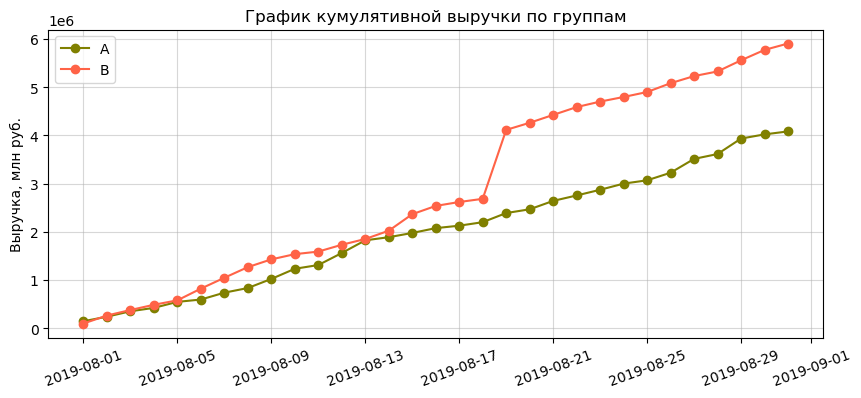

In [19]:
#строим график с помощью заданной функции
plt.figure(figsize=(10,4))
plot_A_B(
    cumulative_data_A['date'], 
    cumulative_data_A['revenue'], 
    cumulative_data_B['revenue'], 
    'График кумулятивной выручки по группам', 
    'Выручка, млн руб.')
plt.show()

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">
Судя по графику, в середине теста произошел резкий рост выручки в группе В. 
С учетом цели исследования, это должен быть ожидаемо хороший результат.
Такой скачок может быть обусловлен либо ростом числа заказов, либо ростом их стоимости.
    Однако резкий скачок предполагает задуматься над возможными ошибками или аномалиями.
    Возможно, дело в нескольких аномально-дорогих заказах. Или же в том, что в конкретный день была, например, однодневная распродажа ("Черная пятница"), и пользователи на фоне скидок сделали большое количество заказов.
    Для понимания ситуации,  следует проанализировать отдельно количество заказов на пользователя, и средний чек покупки. Отобрать данные, чтобы в них не было аномалий, и перестроить графики вновь.</div>

### 2. Построить график кумулятивного среднего чека по группам

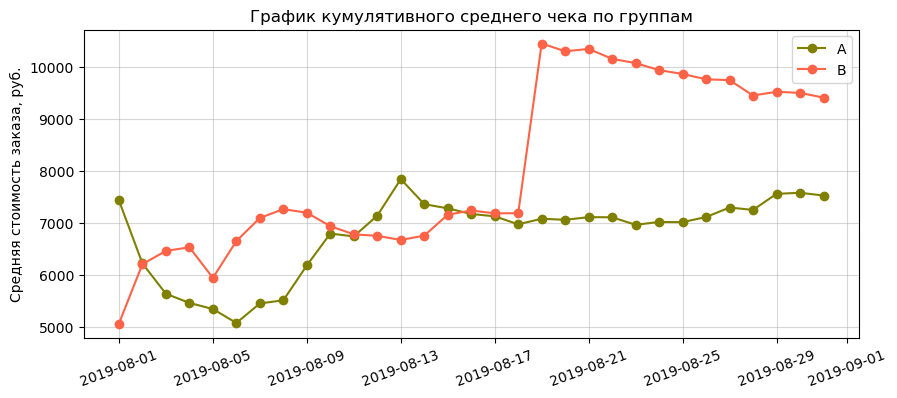

In [20]:
#строим график с помощью заданной функции
plt.figure(figsize=(10,4))
plot_A_B(
    cumulative_data_A['date'],
    cumulative_data_A['revenue']/cumulative_data_A['buyers'],
    cumulative_data_B['revenue']/cumulative_data_B['buyers'],
    'График кумулятивного среднего чека по группам',
    'Средняя стоимость заказа, руб.')
plt.show()

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">
Предположение об одном или нескольких дорогих заказах в группе В подтверждается таким резким скачком графика среднего чека. В дальнейшем, стоит отсеить аномалии и пересмотреть данные.</div>

### 3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A

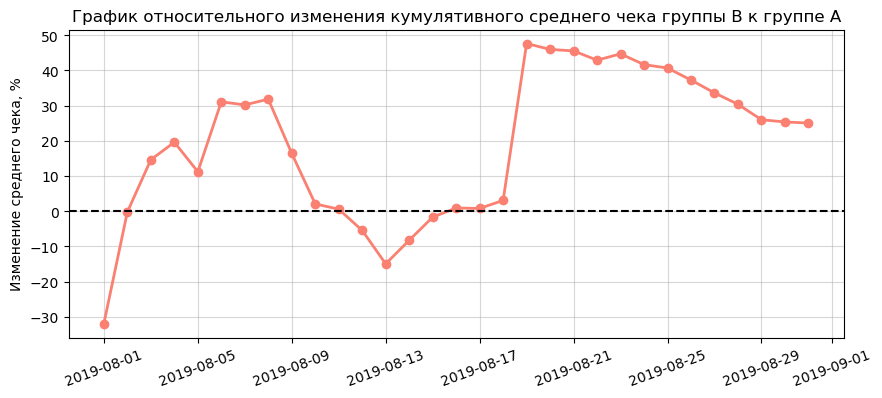

In [21]:
#задаем поле для графика
plt.figure(figsize=(10,4))
#строим график с помощью функции, для удобства переводим значения оси y в проценты
plot_BA(
    cumulative_data_A['date'],
    ((cumulative_data_B['revenue']/cumulative_data_B['buyers'])/ \
         (cumulative_data_A['revenue']/cumulative_data_A['buyers'])-1)*100,
    'График относительного изменения кумулятивного среднего чека группы B к группе A',
    'Изменение среднего чека, %')

plt.show()

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">
    Аналогично с графиком отношения кумулятивного среднего чека группы В к А - в середине теста даже был провал отношения, и контрольная группа показывала худший результат, однако аномальные заказы подняли график, который после всплеска, надо заметить, продолжил снижение. Опять же - далее будет удаление аномально-дорогих заказов, не свойственных выборке, и повторный анализ результатов.</div>

### 4. Построить график кумулятивного среднего количества заказов на посетителя по группам

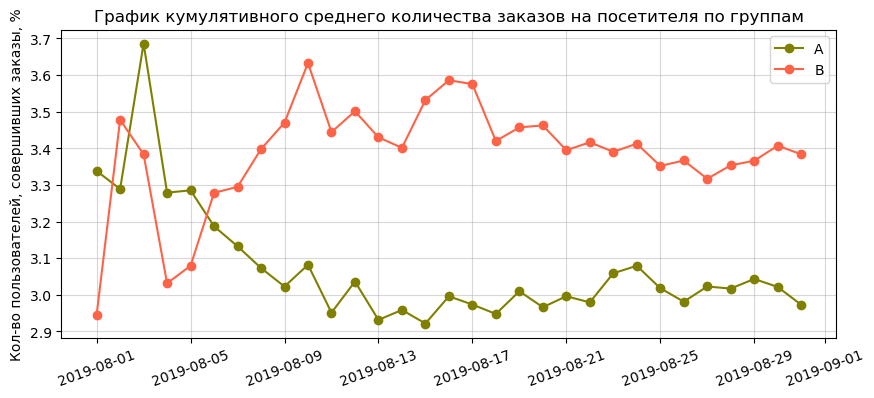

In [22]:
#строим график с помощью заданной функции, для удобства переводим значения оси y в проценты
plt.figure(figsize=(10,4))
plot_A_B(
    cumulative_data_A['date'],
    cumulative_data_A['tpv']*100,
    cumulative_data_B['tpv']*100,
    'График кумулятивного среднего количества заказов на посетителя по группам',
    'Кол-во пользователей, совершивших заказы, %'
)
plt.show()

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">
Интересно, что практически на протяжении всего теста среднее количество заказов на посетителя в экспериментальной группе выше, чем в группе А. Возможно, результат теста покажет значимое увеличение числа заказов, что однозначно повлияет на увеличение выручки. Стоит также проверить выбросы, и провести проверку уровня статистической значимости различий в группах.</div>

### 5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

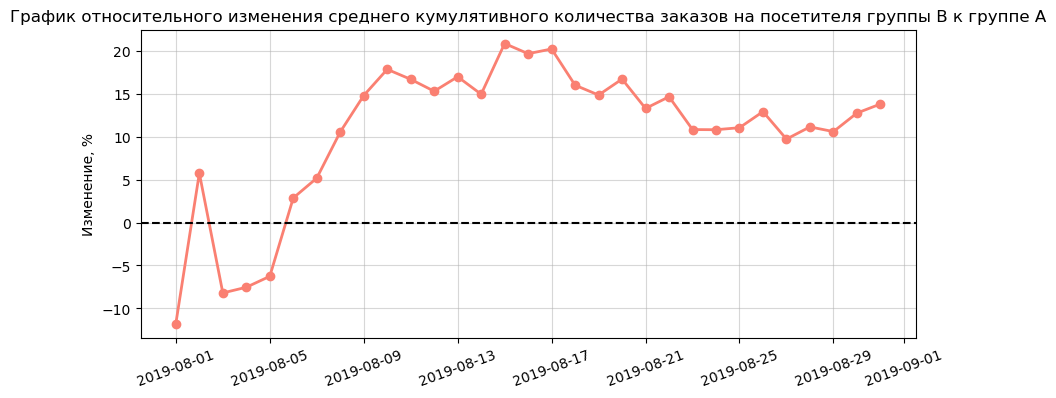

In [38]:
#задаем поле для графика
plt.figure(figsize=(10,4))
#строим график с помощью заданной фукнции, для наглядности переводим значения оси y в проценты
plot_BA(
    cumulative_data_A['date'],
    ((cumulative_data_B['tpv']/cumulative_data_A['tpv'])-1)*100,
    'График относительного изменения среднего кумулятивного количества заказов на посетителя группы В к группе А',
    'Изменение, %'
    )

plt.show()

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">
График показывает лучшую конвертируемость из посетителя в покупателя в экспериментальной группе на уровне 12-13%. Однако есть выбивающиеся всплески. Повторюсь, необходимо очистить данные и построить график снова. А также провести расчет уровня статистической значимости различий.</div>

### 6-7. Построить точечный график количества заказов по пользователям.  Посчитать 95-й и 99-й перцентили количества заказов на пользователя.  Выбрать границу для определения аномальных пользователей.

In [24]:
#сгруппируем заказы по id покупателя
orders_per_visitor = (
    orders.groupby('visitor_id')
    .agg({'transaction_id':'nunique'})
    .reset_index()
)
#зададим названия колонок
orders_per_visitor.columns = ['visitor_id', 'transactions']

#разделим также группировку по группам пользователей
orders_per_visitor_A = (
    orders.query('group == "A"')
    .groupby('visitor_id')
    .agg({'transaction_id':'nunique'})
    .reset_index()
)
#зададим названия колонок
orders_per_visitor_A.columns = ['visitor_id', 'transactions']

#разделим также группировку по группам пользователей
orders_per_visitor_B = (
    orders.query('group == "B"')
    .groupby('visitor_id')
    .agg({'transaction_id':'nunique'})
    .reset_index()
)
#зададим названия колонок
orders_per_visitor_B.columns = ['visitor_id', 'transactions']

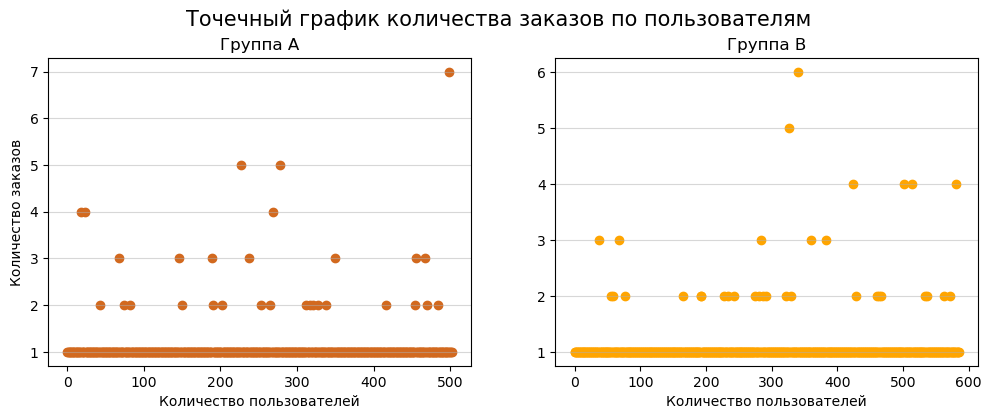

Только у 5% общего числа покупателей количество заказов больше [2.], и только у 1% общего числа покупателей количество заказов больше [4.]


In [25]:
#строим точечные графики количества заказов по пользователям по двум группам
plt.figure(figsize = (12, 4))
plt.suptitle('Точечный график количества заказов по пользователям', y=1, fontsize=15)

#количество заказов в группе А
plt.subplot(1, 2, 1)
plt.title('Группа А')
plt.scatter(range(len(orders_per_visitor_A)), orders_per_visitor_A['transactions'], color='chocolate')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.grid(axis='y', alpha=0.5)

#количество заказов в группе В
plt.subplot(1, 2, 2)
plt.title('Группа В')
plt.scatter(range(len(orders_per_visitor_B)), orders_per_visitor_B['transactions'], color='orange')
plt.xlabel('Количество пользователей')
plt.grid(axis='y', alpha=0.5)
plt.show()

#считаем 95 и 99 перцентили для общей группировки
print(
    'Только у 5% общего числа покупателей количество заказов больше {}, и только у 1% общего числа покупателей количество заказов больше {}'
    .format(np.percentile(orders_per_visitor['transactions'], [95]),
            np.percentile(orders_per_visitor['transactions'], [99]))
)

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Количество заказов на покупателя в обеих группах стабильно на уровне 1, однако есть и выбросы. Визуальная оценка дает возможность предположить, что можно "обрезать" пользователей с количеством заказов больше 2. Однако расчет перцентилей показывает, что такое отсечение уберет 5% пользователей. А выше такое число пользователей было продублировано в обеих группах, и их в данных оставили. Поэтому стоит отсечь только явные аномалии - пользователей, которые совершили более 4 заказов. Для дальнейших расчетов будут использоваться данные с покупателями, совершившими 1, 2 или 3 заказа.</div>

### 8-9. Построить точечный график стоимостей заказов. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Предварительно построение показало, что масштаб графика необходимо увеличивать. Поэтому будут представлено по 2 графика на каждую группу</div>

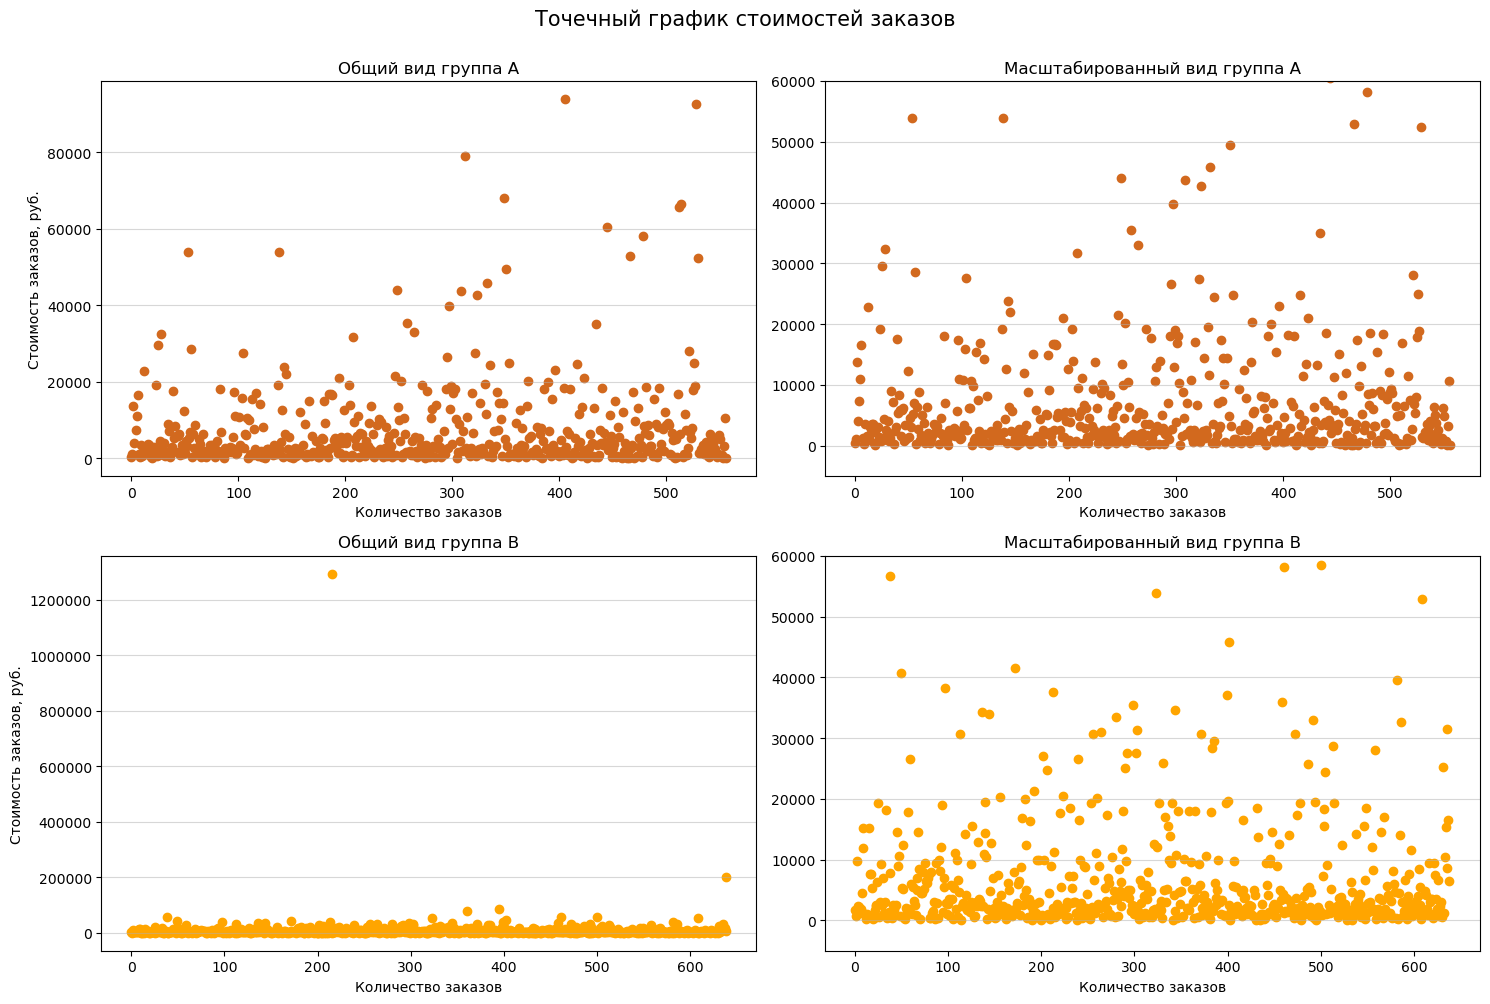

Только 5% заказов дороже [28000.], и только у 1% заказов дороже [58233.2]


In [26]:
#строим точечные графики стоимостей заказов
plt.figure(figsize = (15, 10))
plt.suptitle('Точечный график стоимостей заказов', y=1, fontsize=15)

#график стоимостей заказов группы А
plt.subplot(2, 2, 1)
plt.title('Общий вид группа А')
plt.scatter(range(len(orders.query('group == "A"'))), orders.query('group == "A"')['revenue'], color='chocolate')
plt.ylabel('Стоимость заказов, руб.')
plt.ticklabel_format(axis='y', style='plain')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Количество заказов')

plt.subplot(2, 2, 2)
plt.title('Масштабированный вид группа А')
plt.scatter(range(len(orders.query('group == "A"'))), orders.query('group == "A"')['revenue'], color='chocolate')
plt.ylim(-5000, 60000)
plt.ticklabel_format(axis='y', style='plain')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Количество заказов')

#график стоимостей заказов группы В
plt.subplot(2, 2, 3)
plt.title('Общий вид группа B')
plt.scatter(range(len(orders.query('group == "B"'))), orders.query('group == "B"')['revenue'], color='orange')
plt.ylabel('Стоимость заказов, руб.')
plt.ticklabel_format(axis='y', style='plain')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Количество заказов')

plt.subplot(2, 2, 4)
plt.title('Масштабированный вид группа B')
plt.scatter(range(len(orders.query('group == "B"'))), orders.query('group == "B"')['revenue'], color='orange')
plt.ylim(-5000, 60000)
plt.ticklabel_format(axis='y', style='plain')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Количество заказов')

plt.tight_layout()
plt.show()

#считаем 95 и 99 перцентили для общей группировки
print(
    'Только 5% заказов дороже {}, и только у 1% заказов дороже {}'
    .format(np.percentile(orders['revenue'], [95]),
            np.percentile(orders['revenue'], [99]))
)

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">
    На общем графике группы В отлично виден аномально большой заказ, повлиявший на графики среднего кумулятивного чека. Его удаление обязательно. Но также стоит оценить, какие еще заказы стоит считать аномально-дорогими.
    Визуальная оценка масштабированных графиков позволяет говорить о том, что в группе В большее количество заказов в диапазоне от 20 до 40 тысяч, а выше 40 тысяч - уже явные выбросы в обеих группах.
    Однако расчет перцентелей говорит, что явными выбросами являются только те заказы, что дороже 58223.
    Округлим и заказы стоимостью от 58 000 руб отбросим как аномалии.</div>

### 10-11. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">
Для расчета статистической значимости различий предлагается использовать тест Манна-Уитни, так как в данных есть выбросы и аномалии. Суть теста состоит в сравнении ранжированных списков значений, поэтому для расчета различия среднего количества заказов на пользователя необходимо подготовить два списка, соответствующих по длине количеству посетителей сайта в соответствии с рассматриваемой группой, где каждому пользователю будет соответствовать количество совершенных заказов (в том числе и ноль).</div>

In [27]:
#создаем выборку со всеми пользователями ("сырую")
order_sample_raw_A = (
    (orders_per_visitor_A['transactions'] +  #из сгруппированного списка соответствия кол-ва заказов пользователю берем только заказы
    pd.Series(0,range(visitors.query('group=="A"')['visitors'].sum()))) #делаем список длиною в общее количество посетителей
    .fillna(0) #после суммирования заменяем обратно на нули образовавшиеся пропуски
)

order_sample_raw_B = (
    (orders_per_visitor_B['transactions'] +
    pd.Series(0,range(visitors.query('group=="B"')['visitors'].sum())))
    .fillna(0)
)

#создаем выборку только с теми пользователями, у кого количсетво заказов меньше 4
order_sample_filtered_A = (
    (orders_per_visitor_A.query('transactions < 4')['transactions'] +
    pd.Series(0,range(visitors.query('group=="A"')['visitors'].sum())))
    .fillna(0)
)

order_sample_filtered_B = (
    (orders_per_visitor_B.query('transactions < 4')['transactions'] +
    pd.Series(0,range(visitors.query('group=="B"')['visitors'].sum())))
    .fillna(0)
)

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Проверка статистической значимости различия среднего количества заказов на пользователя по сырым или отфильтрованным данным, предполагает формулировку нулевой и альтернативной гипотез, установку уровня значимости, и проверку результатов работы формулы подсчета с ним.<p>

Сформулируем нулевую гипотезу:

>Различие среднего количества заказов на пользователя между группами отсуствует.

Сформулируем альтернативную гипотезу:

>Различие среднего количества заказов на пользователя между группами существует.

Определим уровень значимости в 5%, то есть примем alpha = 0.05.
    Таким образом, если результат работы функции (минимальный уровень значимости p-value) будет меньше установленного уровня значимости, то нулевая гипотеза <i> отвергается в пользу альтернативной</i>, а если минимальный уровень значимости больше установленного уровня значимости в 5%, то тогда <i>отвергнуть нулевую гипотезу не получится</i>.<p>
Для проверки уровня статистической значимости будем использовать критерий Манна-Уитни.

Первую проверку проведем по сырым данным без устранения аномалий. Вторую проверку - по отфильтрованным.<div>

In [28]:
#задаем уровень статистической значимости
alpha=0.05

In [29]:
#проводим тест и получаем значение минимального уровня значимости
p_value = stats.mannwhitneyu(order_sample_raw_A, order_sample_raw_B)[1]

#сравниваем с заданным уровнем значимости и анализируем результаты
if p_value < alpha:
    print(
        'Минимальный уровень значимости при оценке сырых данных: {:.3f}, нулевая гипотеза отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего количества заказов на пользователя группы B к группе A: {:.2%}'
        .format(order_sample_raw_B.mean() / order_sample_raw_A.mean() - 1)
    )
else:
    print(
        'Минимальный уровень значимости при оценке сырых данных: {:.3f}, нулевая гипотеза не может быть отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего количества заказов на пользователя группы B к группе A: {:.2%}'
        .format(order_sample_raw_B.mean() / order_sample_raw_A.mean() - 1)
    )

Минимальный уровень значимости при оценке сырых данных: 0.017, нулевая гипотеза отвергнута
Относительный прирост среднего количества заказов на пользователя группы B к группе A: 13.81%


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">
Гипотеза об отсуствии различия среднего количества заказов между группами отвергнута. Значит количество заказов в группах неравномерно. Из рассчитанного относительного различия группы В к группе А мы видим прирост в экспериментальной группе на 13,8%. Однако это сырые данные. Необходимо очистить аномалии и пересчитать тест.</div>

In [30]:
#проводим тест и получаем значение минимального уровня значимости
p_value = stats.mannwhitneyu(order_sample_filtered_A, order_sample_filtered_B)[1]

#сравниваем с заданным уровнем значимости и анализируем результаты
if p_value < alpha:
    print(
        'Минимальный уровень значимости при оценке отфильтрованных данных: {:.3f}, нулевая гипотеза отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего количества заказов на пользователя группы B к группе A: {:.2%}'
        .format(order_sample_filtered_B.mean() / order_sample_filtered_A.mean() - 1)
    )
else:
    print(
        'Минимальный уровень значимости при оценке отфильтрованных данных: {:.3f}, нулевая гипотеза не может быть отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего количества заказов на пользователя группы B к группе A: {:.2%}'
        .format(order_sample_filtered_B.mean() / order_sample_filtered_A.mean() - 1)
    )

Минимальный уровень значимости при оценке отфильтрованных данных: 0.016, нулевая гипотеза отвергнута
Относительный прирост среднего количества заказов на пользователя группы B к группе A: 14.99%


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">
После очистки данных, гипотеза об отсуствии различия среднего количества заказов все также отвергнута. Более того, относительный прирост экспериментальной группы В к А увеличился до 14,99%. Это значит, что аномалий было больше в группе А, и экспериментальная группа показала рост среднего числа заказов на пользователя на почти 15%. Отличный результат. Но достаточно ли этого для признания теста успешным? Стоит оценить также различия в среднем чеке.</div>

### 12-13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Проверка статистической значимости различия среднего чека по сырым или отфильтрованным данным, точно также предполагает формулировку нулевой и альтернативной гипотез, установку уровня значимости, и проверку результатов работы формулы подсчета с ним.<p>

Сформулируем нулевую гипотезу:

>Различие суммы среднего чека между группами отсуствует.

Сформулируем альтернативную гипотезу:

>Различие суммы среднего чека между группами существует.

Оставим уровень значимости на уровне 5%.
    Таким образом, если результат работы функции (минимальный уровень значимости p-value) будет меньше установленного уровня значимости, то нулевая гипотеза <i> отвергается в пользу альтернативной</i>, а если минимальный уровень значимости больше установленного уровня значимости в 5%, то тогда <i>отвергнуть нулевую гипотезу не получится</i>.<p>
Для проверки уровня статистической значимости продолжим использовать критерий Манна-Уитни.

Первую проверку проведем по сырым данным без устранения аномалий. Вторую проверку - по отфильтрованным.<div>

In [31]:
#проводим тест и получаем значение минимального уровня значимости
p_value = stats.mannwhitneyu(orders[orders['group'] =='A']['revenue'], orders[orders['group'] =='B']['revenue'])[1]

#сравниваем с заданным уровнем значимости и анализируем результаты
if p_value < alpha:
    print(
        'Минимальный уровень значимости при оценке сырых данных: {:.3f}, нулевая гипотеза отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего чека заказа группы B к группе A: {:.2%}'
        .format(orders[orders['group'] =='B']['revenue'].mean() / orders[orders['group'] =='A']['revenue'].mean() - 1)
    )
else:
    print(
        'Минимальный уровень значимости при оценке сырых данных: {:.3f}, нулевая гипотеза не может быть отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего чека заказа группы B к группе A: {:.2%}'
        .format(orders[orders['group'] =='B']['revenue'].mean() / orders[orders['group'] =='A']['revenue'].mean() - 1)
    )

Минимальный уровень значимости при оценке сырых данных: 0.729, нулевая гипотеза не может быть отвергнута
Относительный прирост среднего чека заказа группы B к группе A: 25.87%


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">При расчете по сырым данным (где, как уже известно, есть крупный выброс) метод Манна-Уитни показал отсутствие статистически значимого различия в среднем чеке между группами. Однако отностельное соотношение среднего чека между группами оказалось на уровне почти 26%. Необходимо удалить выбросы, и посмотреть, насколько на самом деле средний чек группы В превосходит группу А, и превосходит ли.<div>

In [32]:
#проводим тест и получаем значение минимального уровня значимости
p_value = stats.mannwhitneyu(orders.query('group == "A" and revenue < 58000')['revenue'], orders.query('group == "B" and revenue < 58000')['revenue'])[1]

#сравниваем с заданным уровнем значимости и анализируем результаты
if p_value < alpha:
    print(
        'Минимальный уровень значимости при оценке отфильтрованных данных: {:.3f}, нулевая гипотеза отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего чека заказа группы B к группе A: {:.2%}'
        .format(orders.query('group == "B" and revenue < 58000')['revenue'].mean() / orders.query('group == "A" and revenue < 58000')['revenue'].mean() - 1)
    )
else:
    print(
        'Минимальный уровень значимости при оценке отфильтрованных данных: {:.3f}, нулевая гипотеза не может быть отвергнута'
        .format(p_value)
    )
    print(
        'Относительный прирост среднего чека заказа группы B к группе A: {:.2%}'
        .format(orders.query('group == "B" and revenue < 58000')['revenue'].mean() / orders.query('group == "A" and revenue < 58000')['revenue'].mean() - 1)
    )

Минимальный уровень значимости при оценке отфильтрованных данных: 0.615, нулевая гипотеза не может быть отвергнута
Относительный прирост среднего чека заказа группы B к группе A: 2.12%


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">После удаления выбросов получаем максимально понятную формулировку: статистически значимые различия в среднем чеке отсуствуют. По итогу проведения теста относительное изменение среднего чека составило 2.12%. Однако эта цифра может стать отрицательной при увеличении порога аномальных значений. Таким образом можно заявить, что тест показал отсуствие роста среднего чека заказа в экспериментальной группе.<div>

### 14. Принять решение по результатам теста

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Тест проводился с целью проверки гипотезы, для увеличения выручки интернет магазина.
    По проведенным расчетам уровня статистической значимости, не было обнаружено значимого роста среднего чека, однако обнаружен рост числа заказов в экспериментальной группе в диапазоне 15%. Для окончательных решений, стоит сравнить относительные кумулятивные значения до и после фильтрации.<div>

In [33]:
#удалим из файла с заказами пользователей с числом заказов выше 4 и заказы дороже 58 000.
orders_filtered = (
    orders[(orders['visitor_id'].isin(orders_per_visitor.query('transactions <4')['visitor_id'])) \
           & (orders['revenue'] < 58000)]
)
#сравним, сколько строк было удалено
print(orders.shape, orders_filtered.shape)

(1197, 5) (1104, 5)


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Был удален 1% данных, как и предполагалось, отсекая заказы и пользователей выше 99го перцентиля</div>

In [34]:
#перегруппируем файл с заказами по датам и группам, просуммировав количество пользователей, заказов и выручку
grouped_orders_filtered = (
    orders_filtered.groupby(['date','group'])
    .agg({'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'})
)

#также сгруппируем файл с посетителями и просуммируем количество по группам и датам
grouped_visitors = (
    visitors.groupby(['date','group'])
    .agg({'visitors':'sum'})
)

#объединим их в одну таблицу, которая будет служить основой для подсчета кумулятивных значений
grouped_data_filtered = grouped_orders_filtered.merge(grouped_visitors, left_index = True, right_index = True)

#теперь сделаем расчет суммы с накоплением в этой же группировке, удалим индексы в виде дат и групп, присвоим новые названия колонок
cumulative_data_filtered = (
    grouped_data_filtered.groupby(level=-1)[['transaction_id','visitor_id','revenue', 'visitors']]
    .cumsum().reset_index()
)
cumulative_data_filtered.columns = ['date','group','transactions','buyers','revenue', 'visitors']

#смотрим, что получилось, в сравнении с "сырой" таблицей (внимание на суммарные значения)
display(cumulative_data.tail(), cumulative_data_filtered.tail())

#делаем разделение на два фрейма по группам
cumulative_data_filtered_A = cumulative_data_filtered[cumulative_data_filtered['group']=='A'].reset_index()
cumulative_data_filtered_B = cumulative_data_filtered[cumulative_data_filtered['group']=='B'].reset_index()

#добавим колонку с отношением заказов к посетителям
cumulative_data_filtered_A['tpv'] = cumulative_data_filtered_A['transactions']/cumulative_data_filtered_A['visitors']
cumulative_data_filtered_B['tpv'] = cumulative_data_filtered_B['transactions']/cumulative_data_filtered_B['visitors']

,date,group,transactions,buyers,revenue,visitors
57,2019-08-29,B,596,584,5559398,17708
58,2019-08-30,A,545,531,4022970,18037
59,2019-08-30,B,620,608,5774631,18198
60,2019-08-31,A,557,543,4084803,18736
61,2019-08-31,B,640,628,5907760,18916


,date,group,transactions,buyers,revenue,visitors
57,2019-08-29,B,551,546,3458183,17708
58,2019-08-30,A,499,488,3279469,18037
59,2019-08-30,B,575,570,3673416,18198
60,2019-08-31,A,510,499,3336132,18736
61,2019-08-31,B,594,589,3804695,18916


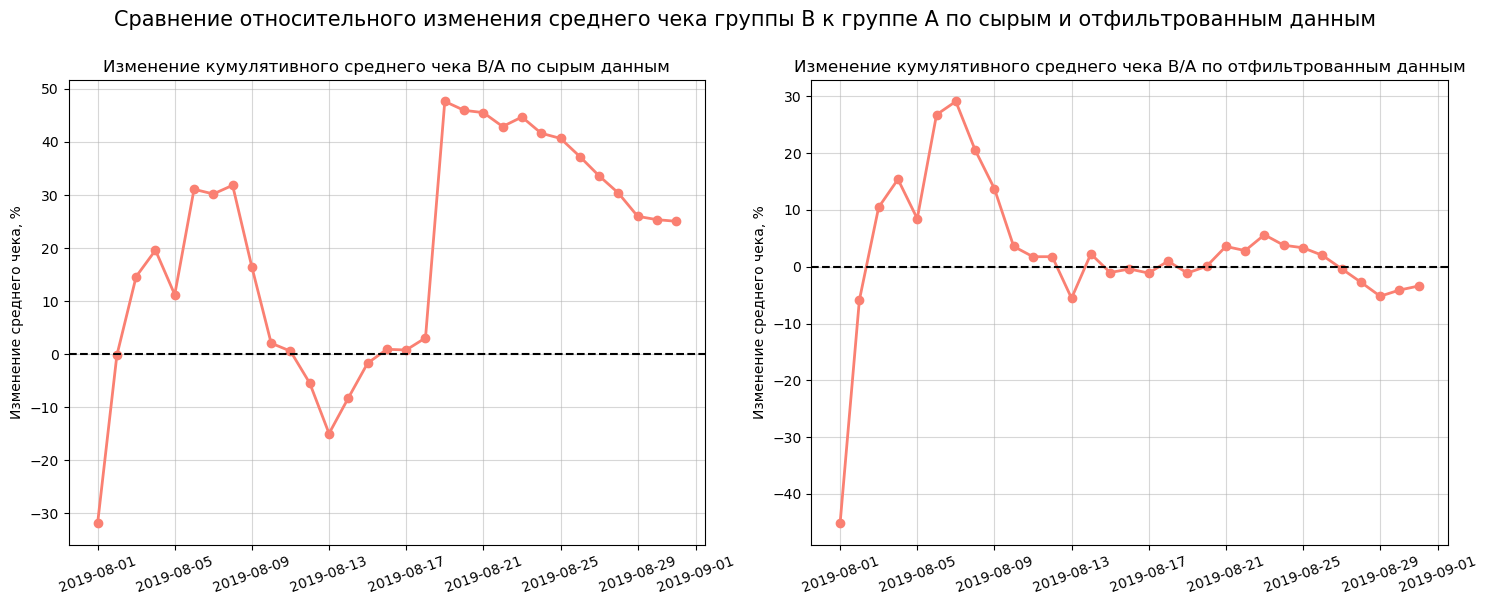

In [35]:
#сравниваем графики относительного изменения среднего чека до и после фильтрации
plt.figure(figsize = (15, 6))
plt.suptitle('Сравнение относительного изменения среднего чека группы В к группе А по сырым и отфильтрованным данным', y=1, fontsize=15)

#данные до фильтрации
plt.subplot(1,2,1)
plot_BA(
    cumulative_data_A['date'],
    ((cumulative_data_B['revenue']/cumulative_data_B['buyers'])/ \
         (cumulative_data_A['revenue']/cumulative_data_A['buyers'])-1)*100,
    'Изменение кумулятивного среднего чека B/A по сырым данным',
    'Изменение среднего чека, %')

#данные после фильтрации
plt.subplot(1,2,2)
plot_BA(
    cumulative_data_filtered_A['date'],
    ((cumulative_data_filtered_B['revenue']/cumulative_data_filtered_B['buyers'])/ \
         (cumulative_data_filtered_A['revenue']/cumulative_data_filtered_A['buyers'])-1)*100,
    'Изменение кумулятивного среднего чека B/A по отфильтрованным данным',
    'Изменение среднего чека, %')

plt.tight_layout()
plt.show()


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Обновленный график изменения кумулятивного среднего чека стал однозначно более информативным. По нему видно, что к концу теста группа В просела относительно группы А в среднем чеке, и дальнейшее продолжение теста не исправит эту ситуацию кардинально. Таким образом можно окончательно зафиксировать, что средний чек группы В не отличается от группы А.</div>

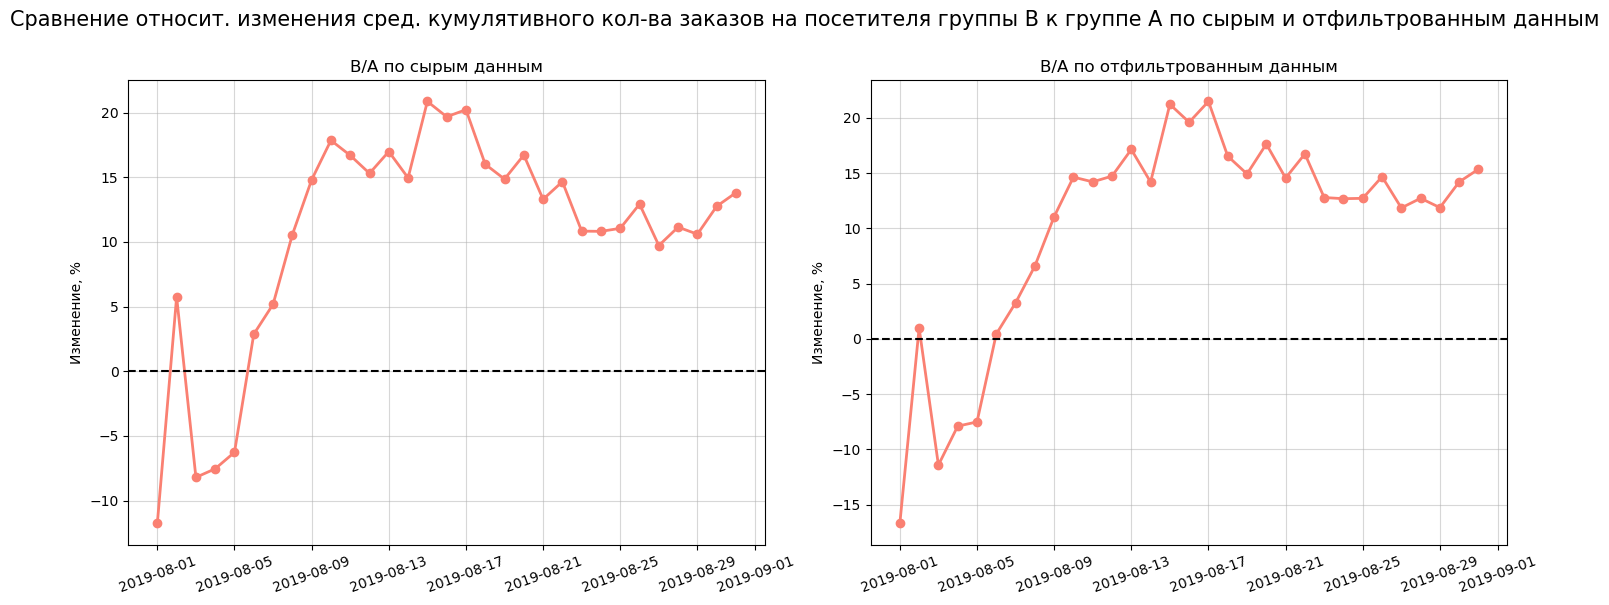

In [36]:
#сравниваем графики относительного изменения количества заказов на пользователя
plt.figure(figsize = (15, 6))
plt.suptitle('Сравнение относит. изменения сред. кумулятивного кол-ва заказов на посетителя группы В к группе А по сырым и отфильтрованным данным', y=1, fontsize=15)

#данные до фильтрации
plt.subplot(1,2,1)
plot_BA(
    cumulative_data_A['date'],
    ((cumulative_data_B['tpv']/cumulative_data_A['tpv'])-1)*100,
    'B/A по сырым данным',
    'Изменение, %'
    )

#данные после фильтрации
plt.subplot(1,2,2)
plot_BA(
    cumulative_data_filtered_A['date'],
    ((cumulative_data_filtered_B['tpv']/cumulative_data_filtered_A['tpv'])-1)*100,
    'B/A по отфильтрованным данным',
    'Изменение, %'
    )

plt.tight_layout()
plt.show()


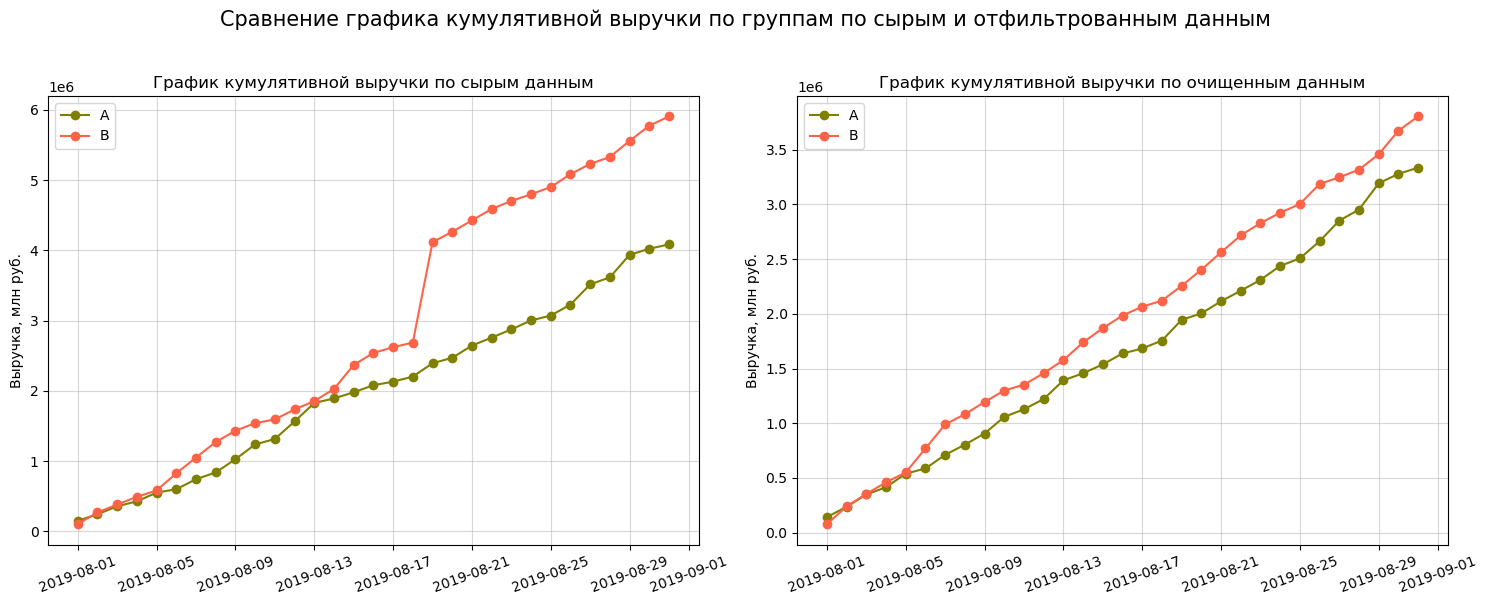

In [37]:
#сравниваем графики относительного изменения среднего чека до и после фильтрации
plt.figure(figsize = (15, 6))
plt.suptitle('Сравнение графика кумулятивной выручки по группам по сырым и отфильтрованным данным', y=1, fontsize=15)

#данные до фильтрации
plt.subplot(1,2,1)
plot_A_B(
    cumulative_data_A['date'], 
    cumulative_data_A['revenue'], 
    cumulative_data_B['revenue'], 
    'График кумулятивной выручки по сырым данным', 
    'Выручка, млн руб.')

#данные после фильтрации
plt.subplot(1,2,2)
plot_A_B(
    cumulative_data_filtered_A['date'], 
    cumulative_data_filtered_A['revenue'], 
    cumulative_data_filtered_B['revenue'], 
    'График кумулятивной выручки по очищенным данным', 
    'Выручка, млн руб.')

plt.tight_layout()
plt.show()

<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Очищение данных от аномалий слабо повлияло на график относительного кумулятивного среднего количества заказов на пользователя. По обоим графикам видно, что пользователи группы В на почти 15% чаще становятся покупателями. Достаточно ли такого уровня для введения изменений и увеличения выручки интернет-магазина - вопрос, требущий дополнительного исследования. <p>

Сравнительный график кумулятивной выручки по группам показал, что очищение данных от аномалий было произведено верно. График по отфильтрованным данным наглядно демонстрирует, что экспериментальная группа показала более высокий уровень выручки.</div>


<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Тест можно завершать с признанной <b>победой группы В в показателе среднего количества заказов на пользователя и, как следствие, увеличением выручки</b>. Дальнейшее продолжение исследования никак не изменит полученные данные.</div>



<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;">Также рекомендуется сделать корректировку выгрузки - возможно, 58 пользователей попали в обе группы ошибочно при обработке полученных данных. Если же выяснится, что пользователи действительно были в обеих группах, рекомендуется признать результаты теста недействительными.</div>